GRUPO 22

Integrantes:

► María Soledad Aramayo

► Daniel Alberto Carballo

► Cristian Daniel Altamiranda

# DOCUMENTACIÓN CANCIONES SPOTIFY

## Introducción

Este código se ha desarrollado para abordar la evaluación y comparación de diversos modelos de clasificación en el contexto de nuestro proyecto de clasificación binaria. El objetivo principal es seleccionar un modelo óptimo que pueda predecir con precisión un resultado binario en nuestros datos. La selección del modelo adecuado es crucial para el éxito de nuestro proyecto.

##Estructura del Código
A continuación, describiremos las distintas secciones de código y explicaremos las razones detrás de nuestras elecciones:

A). Importación de Bibliotecas y Datos:
En esta sección, importamos las bibliotecas necesarias y cargamos nuestros datos. Las bibliotecas, como scikit-learn, xg boost, matplotlib y numpy, proporcionan herramientas esenciales para la evaluación y visualización de modelos. La elección de estas bibliotecas se basa en su amplia adopción y su capacidad para abordar tareas de aprendizaje automático de forma eficaz.

B). Preprocesamiento de Datos:
El preprocesamiento de datos es un paso crítico para garantizar la calidad de los resultados. En esta sección, dividimos nuestros datos en conjuntos de entrenamiento y prueba, normalizamos características y codificamos etiquetas. Estas técnicas son fundamentales para evitar el sobreajuste y garantizar que los modelos sean capaces de generalizar a nuevos datos.

C). Evaluación de Modelos Individuales:
Seleccionamos varios modelos de clasificación, como SVM con kernel RBF, Árbol de Decisión, Naive Bayes (MultinomialNB), Regresión Logística y XG Boost. La elección de estos modelos se basa en su idoneidad para problemas de clasificación y su capacidad para capturar patrones en los datos.
Cada modelo se entrena y evalúa en el conjunto de prueba, y se calculan métricas como la matriz de confusión, la curva ROC, la precisión, el recall y el F1-score. Estas métricas se seleccionaron porque proporcionan una visión completa del rendimiento de los modelos en el contexto de nuestro proyecto.

D). Búsqueda en Cuadrícula (Grid Search):
Aplicamos la búsqueda en cuadrícula para ajustar los hiper parámetros de ciertos modelos, como la Regresión Logística y XG Boost. La optimización de hiper parámetros es esencial para maximizar el rendimiento de los modelos. Elegimos estos modelos específicos debido a su flexibilidad y capacidad para mejorar el rendimiento mediante ajustes precisos.

E). Ensamble de Modelos:
Creamos un ensamble de modelos base, incluyendo SVM con kernel RBF, Árbol de Decisión y XG Boost, mediante el enfoque de votación de la mayoría. La relevancia de este paso radica en la mejora de la robustez y la precisión general al combinar múltiples modelos.

F). Visualización de Resultados:
Visualizamos los resultados utilizando mapas de calor para las matrices de confusión y curvas ROC. Esto permite una comprensión más fácil de las fortalezas y debilidades de los modelos. La elección de estas visualizaciones se basa en su capacidad para comunicar de manera efectiva la información de evaluación.

-----------------------------------------------------------------------------


Durante el desarrollo de este código, se enfrentaron algunos desafíos y consideraciones

Selección de modelos: Elegir los modelos adecuados para nuestro proyecto fue un desafío clave. Optamos por modelos ampliamente utilizados en problemas de clasificación debido a su robustez y flexibilidad.

Limpieza de datos: Durante el proceso, se optó por una limpieza de datos exhaustiva para optimizar los resultados. Esta decisión puede haber reducido ligeramente la precisión, pero aumentó la confiabilidad de los resultados. Antes de esta operación, la mayoría de los modelos arrojan resultados buenos o engañosamente altos, lo que podría haber sido el resultado de datos ruidosos o inconsistentes. La limpieza de datos garantizó que los modelos se entrenan y evaluaran en datos de alta calidad, lo que es fundamental para la confiabilidad y aplicabilidad de nuestro proyecto.
Ajuste de hiper parámetros: Ajustar los hiper parámetros de ciertos modelos puede ser complejo. La búsqueda en cuadrícula nos ayudó a abordar este desafío y encontrar los valores óptimos.
Evaluación de resultados: Interpretar las métricas y visualizaciones para tomar decisiones informadas requería tiempo y análisis cuidadoso.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CONJUNTO DE DATOS**


In [2]:
# Leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importaciones en orden de trabajo  ↓↓↓
import seaborn as sns
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [4]:
# Path de la carpeta donde tenemos los datos
ruta = "/content/drive/MyDrive/Colab Notebooks/Grupo_Upso/Ap.Mq.BigData/TP2/Canciones_Spotify.csv"

In [5]:
# Carga de datos
# Comprobar errores, como la falta del archivo
try:
  df = pd.read_csv(ruta)
except FileNotFoundError as e:
    print(f"Error al leer el archivo: {e}")
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [6]:
# Establece una de las columnas existentes como índice
df.set_index('Unnamed: 0', inplace=True)

# Asigna un nombre al índice
df.index.name = 'index'
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
index,,,,,,,,,,,,,,,,
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man


In [7]:
# Transformamos los nombres de las columnas para una mejor lectura

# Crear un diccionario de mapeo de nombres de columnas
nombres_columnas = {'acousticness': 'acustica','danceability': 'bailabilidad','duration_ms': 'duracion_ms',
                    'energy': 'energia','instrumentalness': 'instrumentalidad','key':'tono' ,
                    'liveness': 'en vivo', 'loudness': 'volumen' ,'speechiness': 'hablado', 'tempo': 'ritmo',
                    'time_signature':'compas', 'valence': 'valencia'}
# Usar el método .rename() para cambiar los nombres de las columnas
df.rename(columns=nombres_columnas, inplace=True)
df

,acustica,bailabilidad,duracion_ms,energia,instrumentalidad,tono,en vivo,volumen,mode,hablado,ritmo,compas,valencia,target,song_title,artist
index,,,,,,,,,,,,,,,,
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man


In [8]:
# Itera a través de las columnas del DataFrame y muestra los valores únicos de cada columna
for column in df.columns:
    unique_values = df[column].unique()
    #print(f"Valores únicos en la columna '{column}':")  ## SOLO PARA VERIFICAR
    #print(unique_values)                                ## SOLO PARA VERIFICAR
    #print("\n")                                         ## SOLO PARA VERIFICAR

In [9]:
# Escalabilizamos
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar la columna 'ritmo'
df['ritmo'] = scaler.fit_transform(df['ritmo'].values.reshape(-1, 1))
df

,acustica,bailabilidad,duracion_ms,energia,instrumentalidad,tono,en vivo,volumen,mode,hablado,ritmo,compas,valencia,target,song_title,artist
index,,,,,,,,,,,,,,,,
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,1.066709,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,1.442323,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,-1.745166,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,-1.316964,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,1.964120,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,-1.747715,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,-0.433385,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,1.067459,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man


In [10]:
# Verificar tipos de datos
tipos_de_datos = df.dtypes
print(tipos_de_datos)

acustica            float64
bailabilidad        float64
duracion_ms           int64
energia             float64
instrumentalidad    float64
tono                  int64
en vivo             float64
volumen             float64
mode                  int64
hablado             float64
ritmo               float64
compas              float64
valencia            float64
target                int64
song_title           object
artist               object
dtype: object


In [11]:
# Verificar valores nulos
df.isna().sum()

acustica            0
bailabilidad        0
duracion_ms         0
energia             0
instrumentalidad    0
tono                0
en vivo             0
volumen             0
mode                0
hablado             0
ritmo               0
compas              0
valencia            0
target              0
song_title          0
artist              0
dtype: int64

In [12]:
# Este código se implementa por seguridad para controlar los tipos de datos
df['acustica'] = df['acustica'].astype(float)
df['bailabilidad'] = df['bailabilidad'].astype(float)
df['energia'] = df['energia'].astype(float)
df['instrumentalidad'] = df['instrumentalidad'].astype(float)
df['tono'] = df['tono'].astype(int)
df['en vivo'] = df['en vivo'].astype(float)
df['mode'] = df['mode'].astype(int)
df['hablado'] = df['hablado'].astype(float)
df['ritmo'] = df['ritmo'].astype(float)
df['compas'] = df['compas'].astype(float)
df['valencia'] = df['valencia'].astype(float)
df['target'] = df['target'].astype(int)

#**1. IDENTIFICACIÓN DE CARACTERÍSTICAS RELEVANTES**  



*   MATRIZ DE CORRELACIÓN DE PEARSON
*   RANDOM FOREST



# **1. MATRIZ DE CORRELACIÓN DE PEARSON**

Con el objetivo de identifica las características que son más relevantes para predecir las preferencias musicales se utilizará como técnica de selección la Matriz de Correlación de Pearson, para observar la dependencia de las características entre sí mediante el estudio de su correlación.

Se calculará la correlación entre cada característica y la etiqueta de preferencia musical (Target: 0 o 1). Las características con correlaciones más altas (positivas o negativas) pueden considerarse como las más relevantes para el modelo de predicción.


Correlación positiva: Un valor de correlación cercano a 1 indica una correlación positiva fuerte. Esto significa que a medida que el valor de una característica aumenta, es más probable que la etiqueta de preferencia también sea 1 (agardo).

Correlación negativa: Un valor de correlación cercano a -1 indica una correlación negativa fuerte. Esto significa que a medida que el valor de una característica aumenta, es menos probable que la etiqueta de preferencia sea 1 (agrado) y más probable que sea 0 (desagrado).

Las variables con mayor correlación con target son:

Coeficiente positivo: bailabilidad, instrumentalidad, hablado y valencia

Coeficiente negativo: acústica

Las variables con mayor correlación positiva son:

-energia y volumen (se va a decartar volumen)

-bailabilidad y valencia (se va a adescartar valencia)

Cuando dos variables tienen una alta correlación (positiva o negativa), significa que están fuertemente relacionadas entre sí. En el contexto de la predicción, si dos variables están altamente correlacionadas, una de ellas puede considerarse redundante en términos de la información que aporta al modelo.

Desechar una de las variables altamente correlacionadas puede tener beneficios, ya que reduce la multicolinealidad en el modelo, lo que puede mejorar la interpretación del modelo y reducir la complejidad. Además, al eliminar variables redundantes, también puedes reducir el riesgo de sobreajuste y mejorar la eficiencia computacional del modelo.

Posibles características a evaluar: bailabilidad, instrumentalidad, hablado, energía y acustica

<ipython-input-13-5fa1be82c95c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


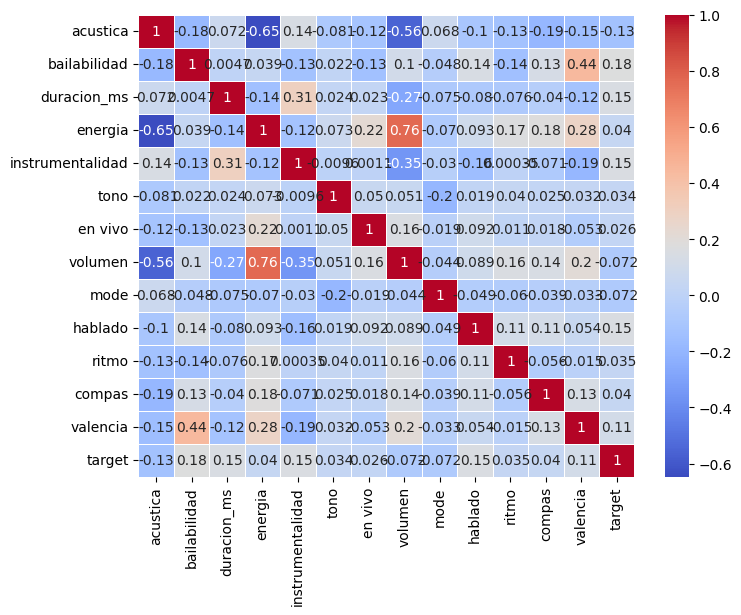

In [13]:
# Calcula la matriz de correlación de Pearson
correlation_matrix = df.corr()

# Crea un mapa de calor con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Muestra el mapa de calor
plt.show()


# **1. RANDOM FOREST**

Se va a utilizar el algoritmo Random Forest  para determinar la importancia de características al predecir gustos musicales.

Se eliminaron las columnas volumes y duracion por no representar importancia para el analisis de nuestros modelos, ademas de representar datos innecesarios para los algoritmos








Random Forest calcula la importancia de cada característica durante el proceso de entrenamiento de los árboles de decisión. Esta importancia se basa en cuánto contribuye cada característica a la reducción de la impureza o el error en las predicciones. Cuanto más se utiliza una característica para tomar decisiones en los árboles y cuánto mejora la precisión del modelo, mayor será su importancia.

Una vez que Random Forest ha sido entrenado, puedes obtener un ranking de importancia de las características. Esto te proporciona información sobre cuáles características son las más influyentes en la tarea de predicción. Puedes usar este ranking para identificar las características más relevantes.

In [14]:
# Configura las opciones de impresión para evitar la notación científica
np.set_printoptions(suppress=True)

In [15]:
# Estructura de datos a numpy

# Obtengo los valores de X
X= df[['acustica', 'bailabilidad', 'energia', 'instrumentalidad', 'tono', 'mode', 'volumen', 'duracion_ms', 'en vivo', 'hablado', 'ritmo', 'compas', 'valencia']].to_numpy()
# Obtengo los valores de y
y= df[['target']].to_numpy()

Se define X e y

In [16]:
X

array([[ 0.0102    ,  0.833     ,  0.434     , ...,  1.06670945,
         4.        ,  0.286     ],
       [ 0.199     ,  0.743     ,  0.359     , ...,  1.4423234 ,
         4.        ,  0.588     ],
       [ 0.0344    ,  0.838     ,  0.412     , ..., -1.74516635,
         4.        ,  0.173     ],
       ...,
       [ 0.00857   ,  0.637     ,  0.935     , ...,  1.0674591 ,
         4.        ,  0.47      ],
       [ 0.00164   ,  0.557     ,  0.992     , ...,  1.06479783,
         4.        ,  0.623     ],
       [ 0.00281   ,  0.446     ,  0.915     , ...,  2.56418006,
         4.        ,  0.402     ]])

In [17]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

In [18]:
# dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

# Durante el proceso de entrenamiento de modelos, pueden ocurrir errores si los datos no son válidos o si hay problemas con los parámetros.
try:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=42)
except Exception as e:
    print(f"Error durante el entrenamiento del modelo: {e}")

In [19]:
X_train

array([[ 0.369     ,  0.662     ,  0.571     , ...,  1.13968823,
         4.        ,  0.442     ],
       [ 0.0015    ,  0.36      ,  0.774     , ..., -1.55171823,
         4.        ,  0.664     ],
       [ 0.028     ,  0.658     ,  0.568     , ...,  0.26368048,
         4.        ,  0.881     ],
       ...,
       [ 0.517     ,  0.691     ,  0.714     , ..., -1.14540596,
         4.        ,  0.96      ],
       [ 0.158     ,  0.633     ,  0.964     , ...,  0.09066042,
         4.        ,  0.111     ],
       [ 0.0525    ,  0.779     ,  0.659     , ..., -0.99704951,
         4.        ,  0.924     ]])

In [20]:
# Verificar si hay valores negativos en X_train
negative_values = (X_train < 0).any()

# Imprimir las características que contienen valores negativos
if negative_values.any():
    print("Hay valores negativos en las siguientes características:")
    features_with_negative_values = np.where(negative_values)[0]
    for feature_index in features_with_negative_values:
        print(f"Característica {feature_index}: {X_train[:, feature_index].min()} es el valor mínimo.")
else:
    print("No hay valores negativos en X_train.")

Hay valores negativos en las siguientes características:
Característica 0: 2.84e-06 es el valor mínimo.


In [21]:
X_test

array([[ 0.748     ,  0.52      ,  0.0748    , ..., -0.53511294,
         4.        ,  0.134     ],
       [ 0.0726    ,  0.739     ,  0.526     , ...,  0.83754033,
         4.        ,  0.374     ],
       [ 0.0021    ,  0.646     ,  0.892     , ..., -0.06016989,
         4.        ,  0.935     ],
       ...,
       [ 0.000334  ,  0.907     ,  0.616     , ...,  0.09118518,
         4.        ,  0.614     ],
       [ 0.35      ,  0.794     ,  0.801     , ...,  0.95463623,
         4.        ,  0.73      ],
       [ 0.0361    ,  0.312     ,  0.907     , ..., -0.04937488,
         4.        ,  0.122     ]])

In [22]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [23]:
y_test

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

**GRID SEARCH**

Se va a aplicar GRID SEARCH para obtener el mejor ajuste de los parametros para RandomForestClassifier

La búsqueda en cuadrícula, o "Grid Search", es una técnica que se utiliza en el aprendizaje automático para encontrar la combinación óptima de hiperparámetros para un modelo. Los hiperparámetros son configuraciones específicas que no se aprenden a partir de los datos, sino que deben establecerse antes de entrenar un modelo.

In [24]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
}

# Crea el objeto GridSearchCV con RandomForestClassifier como estimador
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
rf_best_model = grid_search.best_estimator_
rf_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
rf_accuracy = rf_best_model.score(X_test, y_test)

# Imprime los resultados
print()
print("Mejor modelo:", rf_best_model)
print("Mejores hiperparámetros:", rf_best_params)
print("Exactitud en el conjunto de prueba:", rf_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe


Mejor modelo: RandomForestClassifier(n_estimators=300, random_state=0)
Mejores hiperparámetros: {'min_samples_split': 2, 'n_estimators': 300}
Exactitud en el conjunto de prueba: 0.7819623389494549


In [25]:
# Creamos un modelo de Random Forest
clf = rf_best_model

# Ajustamos el modelo a los datos
clf.fit(X, y)

# Obtenemos la importancia de las características
feature_importances = clf.feature_importances_

# Especificamos un umbral de importancia
threshold = 0.085

# Creamos un selector de características basado en el umbral
sfm = SelectFromModel(clf, threshold=threshold)

# Aplicamos la selección de características a los datos
X_new = sfm.transform(X)

# Lista de etiquetas para las características
etiquetas = ['acustica', 'bailabilidad', 'energia', 'instrumentalidad', 'tono', 'mode', 'volumen', 'duracion_ms', 'en vivo', 'hablado', 'ritmo', 'compas', 'valencia']

# Obtén una máscara booleana que indica cuáles características se mantienen
feature_mask = sfm.get_support()

# Usa la máscara para obtener las características seleccionadas por nombre
selected_features = [etiquetas[feature] for feature, keep in enumerate(feature_mask) if keep]

# Ahora X_new contiene solo las características cuya importancia supera el umbral
print("Número de características originales:", X.shape[1])
print("Número de posibles caracteristicas a seleccionar:", X_new.shape[1])
print()
print("Posibles caracteristicas a seleccionar:")
for feature_name in selected_features:
    print(feature_name)

<ipython-input-25-5fd5852f5b40>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


Número de características originales: 13
Número de posibles caracteristicas a seleccionar: 7

Posibles caracteristicas a seleccionar:
acustica
bailabilidad
energia
instrumentalidad
volumen
duracion_ms
hablado


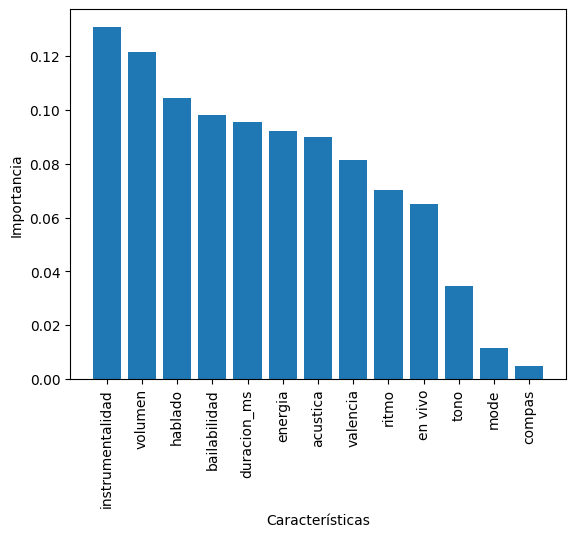

In [26]:
# Lista de etiquetas para las características
etiquetas = ['acustica', 'bailabilidad', 'energia', 'instrumentalidad', 'tono', 'mode', 'volumen', 'duracion_ms', 'en vivo', 'hablado', 'ritmo', 'compas', 'valencia']

# Obtener los índices que ordenarán los valores de importancia de características de mayor a menor
indices_ordenados = np.argsort(feature_importances)[::-1]  # [::-1] invierte el orden para tener los más altos primero

# Ordenar las etiquetas y los valores de importancia de acuerdo con los índices
etiquetas_ordenadas = [etiquetas[i] for i in indices_ordenados]
importancia_ordenada = [feature_importances[i] for i in indices_ordenados]

# Crear un gráfico de barras de importancia de características ordenado
plt.bar(range(len(importancia_ordenada)), importancia_ordenada)
plt.xticks(range(len(importancia_ordenada)), etiquetas_ordenadas, rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


#**2. SEPARAR EN DATOS DE ENTRENAMIENTO Y DATOS DE PRUEBA (Caracteristicas más relevantes: acustica, instrumentalidad, hablado, bailabilidad y energía)**  

**CAMBIO DE ESTRUCTURA DE DATOS A NUMPY**

Se va a separar las columnas del dataframe de la siguiente forma:


*   **Variables de entrada X**: Array de Arrays de numpy en el que cada array tiene las variables de entrada de un elemento: acustica, instrumentalidad, hablado, bailabilidad y energia.
*   **Variable de salida y** : Array de numpy en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset: target


* Se descartarán las columnas volumen y duracion_ms, ya que no son columnas relevantes para utilizar en los modelos y darían datos desviados al objetivo


In [27]:
# Configura las opciones de impresión para evitar la notación científica
np.set_printoptions(suppress=True)

In [28]:
# Estructura de datos a numpy
# Obtener los valores de X
#  segun Random Forest (mejor rendimiento)
X= df[['acustica', 'bailabilidad', 'energia', 'instrumentalidad', 'hablado']].to_numpy()

# Obtener los valores de y
y= df[['target']].to_numpy()

In [29]:
X

array([[0.0102   , 0.833    , 0.434    , 0.0219   , 0.431    ],
       [0.199    , 0.743    , 0.359    , 0.00611  , 0.0794   ],
       [0.0344   , 0.838    , 0.412    , 0.000234 , 0.289    ],
       ...,
       [0.00857  , 0.637    , 0.935    , 0.00399  , 0.107    ],
       [0.00164  , 0.557    , 0.992    , 0.677    , 0.133    ],
       [0.00281  , 0.446    , 0.915    , 0.0000387, 0.141    ]])

In [30]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

In [31]:
# dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)
# Durante el proceso de entrenamiento de modelos, pueden ocurrir errores si los datos no son válidos o si hay problemas con los parámetros.
try:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=42)
except Exception as e:
    print(f"Error durante el entrenamiento del modelo: {e}")

In [32]:
X_train

array([[0.369   , 0.662   , 0.571   , 0.000197, 0.106   ],
       [0.0015  , 0.36    , 0.774   , 0.807   , 0.0384  ],
       [0.028   , 0.658   , 0.568   , 0.00356 , 0.0312  ],
       ...,
       [0.517   , 0.691   , 0.714   , 0.0164  , 0.046   ],
       [0.158   , 0.633   , 0.964   , 0.0159  , 0.0298  ],
       [0.0525  , 0.779   , 0.659   , 0.      , 0.0808  ]])

In [33]:
X_test

array([[0.748   , 0.52    , 0.0748  , 0.633   , 0.0497  ],
       [0.0726  , 0.739   , 0.526   , 0.      , 0.101   ],
       [0.0021  , 0.646   , 0.892   , 0.00626 , 0.0331  ],
       ...,
       [0.000334, 0.907   , 0.616   , 0.425   , 0.0577  ],
       [0.35    , 0.794   , 0.801   , 0.      , 0.271   ],
       [0.0361  , 0.312   , 0.907   , 0.618   , 0.229   ]])

In [34]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [35]:
y_test

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])


#**3. REALIZAR VARIOS MODELOS DE MACHINE LEARNING**  



*   KNN (K-NEAREST NEIGHBORS)
*   SVM CON KERNEL LINEAR
*   SVM CON KERNEL RBF
*   SVM CON KERNEL POLY
*   SVM CON KERNEL SIGMOID
*   ÁRBOL DE DECISIÓN
*   NAIVE BAYES GaussianNB
*   NAIVE BAYES MultinomialNB
*   REGRESION LOGISTICA
*   XGBOOST



# **3. KNN (K-NEAREST NEIGHBORS)**

**GRID SEARCH**

In [36]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13,15,17,19,21],  # Valores para el número de vecinos
    'weights': ['uniform', 'distance'],  # Valores para la ponderación de los vecinos
}

# Crea el objeto GridSearchCV con KNeighborsClassifier como estimador
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
knn_best_model = grid_search.best_estimator_
knn_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
knn_accuracy = knn_best_model.score(X_test, y_test)

# Imprime los resultados
print(f"")
print(f"Mejor modelo: {knn_best_model}")
print(f"Mejores hiperparámetros: {knn_best_params}")
print(f"Exactitud en el conjunto de prueba: {knn_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


Mejor modelo: KNeighborsClassifier(n_neighbors=17, weights='distance')
Mejores hiperparámetros: {'n_neighbors': 17, 'weights': 'distance'}
Exactitud en el conjunto de prueba: 0.6778989098116948


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
# Crea una instancia de la clase KNeighborsClassifier con n_neighbors establecido en 2.
# n_neighbors representa la cantidad de vecinos más ceracanos que se tomarán en cuenta al hacer una predicción.
knn_model = knn_best_model

# El método fit en scikit-learn se utiliza para entrenar un modelo de aprendizaje automático con datos de entrenamiento
# El método .ravel() se utiliza para convertir etiquetas o matrices multidimensionales en una matriz unidimensional, ya que la mayoría de los algoritmos de clasificación en scikit-learn esperan que las etiquetas sean un arreglo unidimensional.
knn_model.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=17, weights='distance')

In [38]:
# #Una vez que el modelo (knn_model) está entrenado previamente con datos de entrenamiento (X_train, y_train),
# se va a utiliza para predecir las etiquetas de clase(0=desagrado, 1=agrado) en un conjunto de datos de prueba (X_test).
y_pred_knn = knn_model.predict(X_test)

**MATRIZ DE CONFUSIÓN**

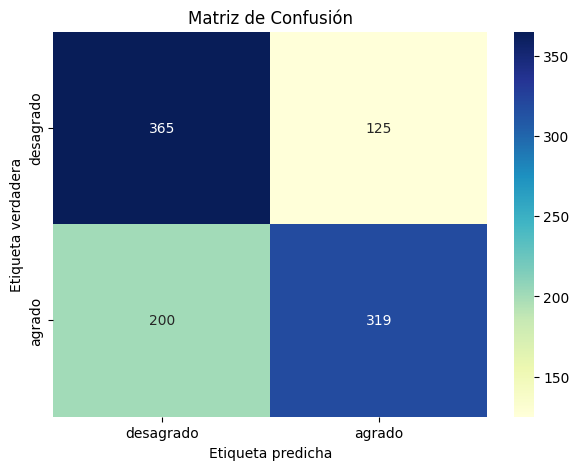

In [39]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_knn)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['desagrado', 'agrado'], yticklabels=['desagrado', 'agrado'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

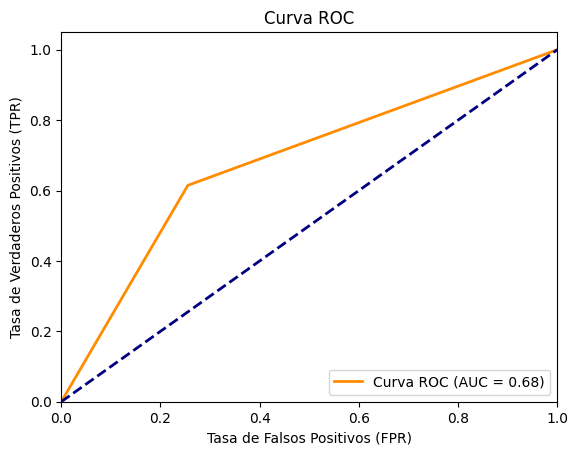

Área bajo la curva ROC (AUC-ROC): 0.68


In [40]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_knn)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

La función classification_report de Scikit-Learn s utiliza para generar un informe detallado de métricas de rendimiento en un problema de clasificación. Este informe proporciona información detallada sobre cómo se comporta el modelo en el conjunto de prueba y es una herramienta valiosa para evaluar su rendimiento.

El informe generado por classification_report suele incluir las siguientes métricas para cada clase en el problema de clasificación (por ejemplo, clases positivas y negativas):

Precisión (Precision): La proporción de predicciones positivas que son correctas. Es útil cuando deseas minimizar los falsos positivos.

Recall (Recuperación): La proporción de casos positivos reales que se identificaron correctamente. Es útil cuando deseas minimizar los falsos negativos.

F1-score: La media armónica de precisión y recall. Proporciona un equilibrio entre ambas métricas. Es útil cuando no puedes decidir entre precisión y recall.

Soporte (Support): El número de muestras en el conjunto de prueba que pertenecen a esa clase.

Exactitud (Accuracy): La proporción de predicciones correctas en el conjunto de prueba en general.

Puntuación F1 ponderada (Weighted F1 Score): Un promedio ponderado del F1-score para todas las clases, donde el peso es el soporte de cada clase.

Exactitud ponderada (Weighted Accuracy): Un promedio ponderado de la exactitud para todas las clases, donde el peso es el soporte de cada clase.

Este informe es útil para comprender cómo el modelo se desempeña en cada clase y para identificar si existe un desequilibrio en la calidad de las predicciones entre las clases. También te ayuda a determinar qué métricas son más importantes en tu problema.

En resumen, utilizar classification_report es una buena práctica para obtener una visión detallada del rendimiento de un modelo de clasificación en el conjunto de prueba. Puede ser especialmente útil cuando estás trabajando con problemas de clasificación multiclase o desequilibrados.

In [41]:
# Precisión del clasificador de regresión logística en el conjunto de prueba
# classification_report
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.65      0.74      0.69       490
           1       0.72      0.61      0.66       519

    accuracy                           0.68      1009
   macro avg       0.68      0.68      0.68      1009
weighted avg       0.68      0.68      0.68      1009



Accuracy (Exactitud):
Es la proporción de predicciones correctas entre el total de predicciones realizadas. Es útil cuando las clases están aproximadamente equilibradas, es decir, no hay una clase que sea mucho más frecuente que las otras. Si tu dataset tiene una distribución de clases relativamente equilibrada y estás interesado simplemente en la proporción global de predicciones correctas, la exactitud puede ser una buena métrica.

Precision:
Es la proporción de predicciones positivas que fueron correctas. Es útil cuando los falsos positivos son particularmente costosos o indeseables. Si estás más preocupado por asegurarte de que las predicciones positivas del modelo sean correctas (y estás dispuesto a sacrificar algunos falsos negativos), la precisión es una métrica relevante.

Recall (Sensibilidad):
Es la proporción de verdaderos positivos entre todos los casos positivos reales. Es útil cuando los falsos negativos son particularmente costosos o indeseables. Si estás más preocupado por identificar todos los casos positivos (aun a riesgo de tener algunos falsos positivos), el recall es una métrica relevante.

F-score (específicamente F1-score):
Es la media armónica de precisión y recall, proporcionando un equilibrio entre ambas métricas. Es útil cuando quieres equilibrar precisión y recall y no estás seguro de cuál métrica priorizar. Es especialmente útil en situaciones donde las clases están desequilibradas.

In [42]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_knn)

# Calcular la precisión
precision = precision_score(y_test, y_pred_knn)

# Calcular el recall
recall = recall_score(y_test, y_pred_knn)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_knn)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.6778989098116948
Precisión (Precision): 0.7184684684684685
Recall: 0.6146435452793835
F1-score: 0.6625129802699895


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

La validación cruzada (cross-validation) con la técnica K-Fold para evaluar el rendimiento de un modelo, en este caso, un clasificador k-Nearest Neighbors(knn_model) en un conjunto de datos.


In [43]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(knn_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

Scores de validación cruzada: [0.66089109 0.69306931 0.67493797 0.6898263  0.66253102]
Media de los scores: 0.6762511362798811
Desviación estándar de los scores: 0.013364379060058721
Exactitud promedio: 0.6762511362798811


# **3. SVM CON KERNEL LINEAR**

**GRID SEARCH**

In [44]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de C
    'class_weight': [None, 'balanced'],  # Opciones para el peso de las clases
    'tol': [1e-4, 1e-3, 1e-2],  # Valores de tolerancia
    'max_iter': [100, 500, 1000]  # Valores de iteraciones máximas
}

# Crea el objeto GridSearchCV con SVC(kernel='linear') como estimador
grid_search = GridSearchCV(estimator=SVC(kernel='linear', random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
svm_linear_best_model = grid_search.best_estimator_
svm_linear_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
svm_linear_accuracy = svm_linear_best_model.score(X_test, y_test)

# Imprime los resultados
print()
print(f"Mejor modelo: {svm_linear_best_model}")
print(f"Mejores hiperparámetros: {svm_linear_best_params}")
print(f"Exactitud en el conjunto de prueba: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle


Mejor modelo: SVC(C=10, kernel='linear', max_iter=1000, random_state=42, tol=0.0001)
Mejores hiperparámetros: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'tol': 0.0001}
Exactitud en el conjunto de prueba: 0.6778989098116948


**SVM CON KERNEL LINEAR CON HIPERPARAMETROS AJUSTADOS CON GRID SEARCH**

In [45]:
# Crear una instancia del modelo SVM con kernel lineal con hiperparametros ajustados con GRID SEARCH

svm_linear_model = svm_linear_best_model
# Entreno el modelo
svm_linear_model.fit(X_train, y_train)
# Las predicciones se almacenan en la variable y_pred.
y_pred_svm_linear = svm_linear_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**MATRIZ DE CONFUSIÓN**

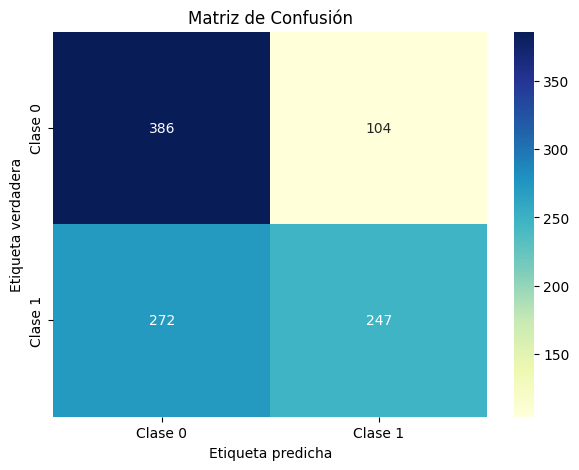

In [46]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_svm_linear)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

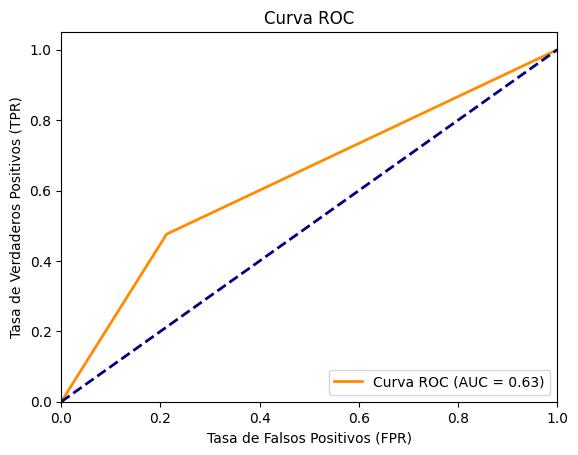

Área bajo la curva ROC (AUC-ROC): 0.63


In [47]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_linear)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_svm_linear)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [48]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_svm_linear)

# Calcular la precisión
precision = precision_score(y_test, y_pred_svm_linear)

# Calcular el recall
recall = recall_score(y_test, y_pred_svm_linear)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_svm_linear)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.6273538156590683
Precisión (Precision): 0.7037037037037037
Recall: 0.47591522157996147
F1-score: 0.5678160919540229


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [49]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(svm_linear_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Scores de validación cruzada: [0.67326733 0.60148515 0.66501241 0.64516129 0.63523573]
Media de los scores: 0.6440323809055843
Desviación estándar de los scores: 0.025233969178965837
Exactitud promedio: 0.6440323809055843


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# **3. SVM CON KERNEL RBF**

**GRID SEARCH**

In [50]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de C
    'class_weight': [None, 'balanced'],  # Opciones para el peso de las clases
    'tol': [1e-4, 1e-3, 1e-2],  # Valores de tolerancia
    'max_iter': [100, 500, 1000]  # Valores de iteraciones máximas
}

# Crea el objeto GridSearchCV con SVC(kernel='rbf') como estimador
grid_search = GridSearchCV(estimator=SVC(kernel='rbf', random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
svm_rbf_best_model = grid_search.best_estimator_
svm_rbf_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
svm_rbf_accuracy = svm_rbf_best_model.score(X_test, y_test)

# Imprime los resultados
print()
print(f"Mejor modelo: {svm_rbf_best_model}")
print(f"Mejores hiperparámetros: {svm_rbf_best_params}")
print(f"Exactitud en el conjunto de prueba: {svm_rbf_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle


Mejor modelo: SVC(C=10, max_iter=500, random_state=42, tol=0.0001)
Mejores hiperparámetros: {'C': 10, 'class_weight': None, 'max_iter': 500, 'tol': 0.0001}
Exactitud en el conjunto de prueba: 0.7046580773042617


**SVM CON KERNEL RBF CON HIPERPARAMETROS AJUSTADOS CON GRID SEARCH**

In [51]:
# Crear una instancia del modelo SVM con núcleo RBF
svm_rbf_model = svm_rbf_best_model

# Entreno el modelo
svm_rbf_model.fit(X_train, y_train)
# Las predicciones se almacenan en la variable y_pred.
y_pred_svm_rbf = svm_rbf_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**MATRIZ DE CONFUSIÓN**

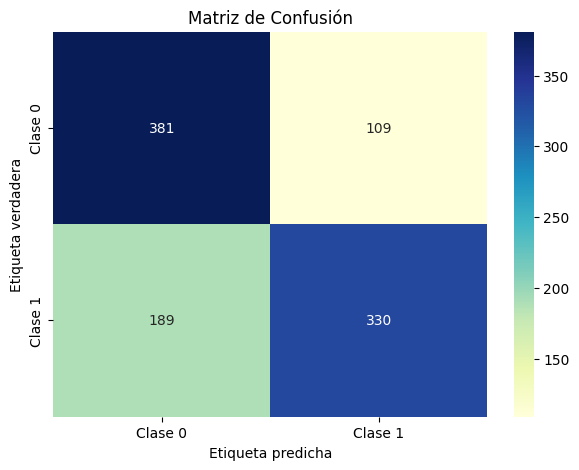

In [52]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_svm_rbf)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

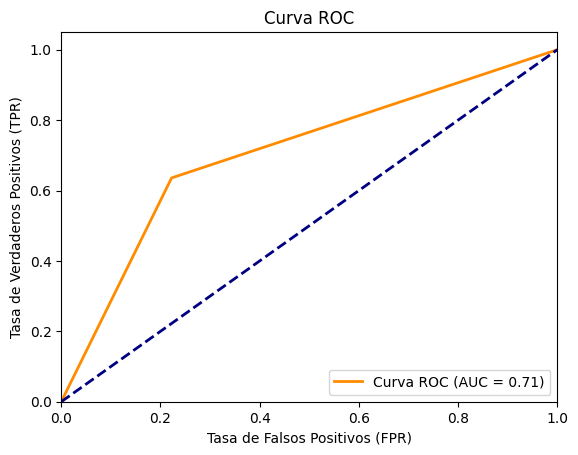

Área bajo la curva ROC (AUC-ROC): 0.71


In [53]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_rbf)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_svm_rbf)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [54]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_svm_rbf)

# Calcular la precisión
precision = precision_score(y_test, y_pred_svm_rbf)

# Calcular el recall
recall = recall_score(y_test, y_pred_svm_rbf)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_svm_rbf)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.7046580773042617
Precisión (Precision): 0.7517084282460137
Recall: 0.6358381502890174
F1-score: 0.6889352818371608


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [55]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(svm_rbf_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Scores de validación cruzada: [0.55940594 0.58415842 0.61042184 0.61042184 0.60545906]
Media de los scores: 0.5939734171928359
Desviación estándar de los scores: 0.01982052265151754
Exactitud promedio: 0.5939734171928359


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# **3. SVM CON KERNEL POLY**

**GRID SEARCH**

In [56]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de C
    'degree': [2, 3, 4],  # Grados del polinomio
    'coef0': [0.0, 0.1, 0.5, 1.0],  # Término independiente en el kernel polinómico
    'max_iter': [100, 500, 1000]  # Valores de iteraciones máximas
}

# Crea el objeto GridSearchCV con SVC(kernel='poly') como estimador
grid_search = GridSearchCV(estimator=SVC(kernel='poly', random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
svm_poly_best_model = grid_search.best_estimator_
svm_poly_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
svm_poly_accuracy = svm_poly_best_model.score(X_test, y_test)

# Imprime los resultados
print()
print(f"Mejor modelo: {svm_poly_best_model}")
print(f"Mejores hiperparámetros: {svm_poly_best_params}")
print(f"Exactitud en el conjunto de prueba: {svm_poly_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle


Mejor modelo: SVC(C=1, coef0=0.1, degree=4, kernel='poly', max_iter=1000, random_state=42)
Mejores hiperparámetros: {'C': 1, 'coef0': 0.1, 'degree': 4, 'max_iter': 1000}
Exactitud en el conjunto de prueba: 0.6749256689791873


**SVM CON KERNEL POLY CON HIPERPARAMETROS AJUSTADOS CON GRID SEARCH**

In [57]:
# Crear una instancia del modelo SVM con núcleo RBF
svm_poly_model = svm_poly_best_model
#svm_poly = SVC(kernel='poly', random_state=42)
# Entreno el modelo
svm_poly_model.fit(X_train, y_train)
# Las predicciones se almacenan en la variable y_pred.
y_pred_svm_poly = svm_poly_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**MATRIZ DE CONFUSIÓN**

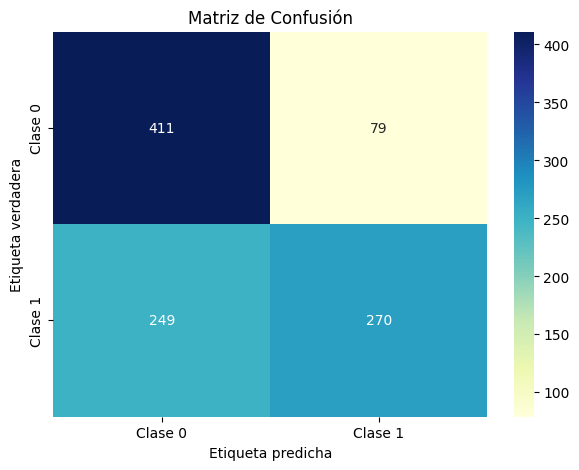

In [58]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_svm_poly)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

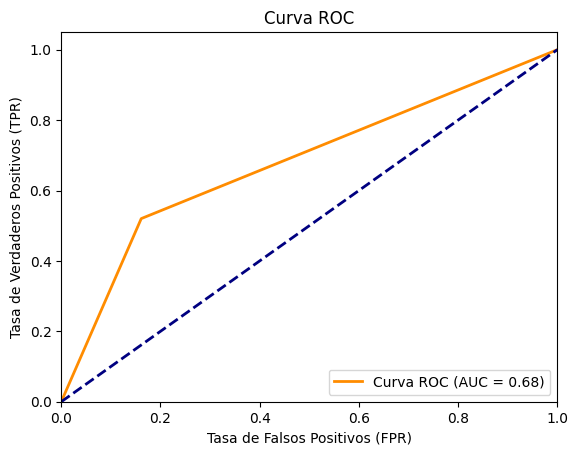

Área bajo la curva ROC (AUC-ROC): 0.68


In [59]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_poly)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_svm_poly)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [60]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_svm_poly)

# Calcular la precisión
precision = precision_score(y_test, y_pred_svm_poly)

# Calcular el recall
recall = recall_score(y_test, y_pred_svm_poly)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_svm_poly)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.6749256689791873
Precisión (Precision): 0.7736389684813754
Recall: 0.5202312138728323
F1-score: 0.6221198156682027


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [61]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(svm_poly_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Scores de validación cruzada: [0.55693069 0.55445545 0.67741935 0.55831266 0.61538462]
Media de los scores: 0.5925005527848071
Desviación estándar de los scores: 0.048200291944034065
Exactitud promedio: 0.5925005527848071


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# **3. SVM CON KERNEL SIGMOID**

**GRID SEARCH**

In [62]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de C
    'coef0': [0.0, 0.1, 0.5, 1.0],  # Valores de coef0
    'class_weight': [None, 'balanced'],  # Opciones para el peso de las clases
    'max_iter': [100, 500, 1000],  # Valores de iteraciones máximas
}

# Crea el objeto GridSearchCV con SVC(kernel='sigmoid') como estimador
grid_search = GridSearchCV(estimator=SVC(kernel='sigmoid', random_state=42, gamma='scale'), param_grid=param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
svm_sigmoid_best_model = grid_search.best_estimator_
svm_sigmoid_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
svm_sigmoid_accuracy = svm_sigmoid_best_model.score(X_test, y_test)

# Imprime los resultados
print(f"Mejor modelo: {svm_sigmoid_best_model}")
print(f"Mejores hiperparámetros: {svm_sigmoid_best_params}")
print(f"Exactitud en el conjunto de prueba: {svm_sigmoid_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Mejor modelo: SVC(C=0.1, class_weight='balanced', coef0=0.1, kernel='sigmoid', max_iter=1000,
    random_state=42)
Mejores hiperparámetros: {'C': 0.1, 'class_weight': 'balanced', 'coef0': 0.1, 'max_iter': 1000}
Exactitud en el conjunto de prueba: 0.5163528245787908


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [63]:
# Crear una instancia del modelo SVM con núcleo SIGMOID con hiperparametros ajustados con GRID SEARCH
svm_sigmoid_model = svm_sigmoid_best_model

# Entreno el modelo
svm_sigmoid_model.fit(X_train, y_train)
# Las predicciones se almacenan en la variable y_pred.
y_pred_svm_sigmoid = svm_sigmoid_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**MATRIZ DE CONFUSIÓN**

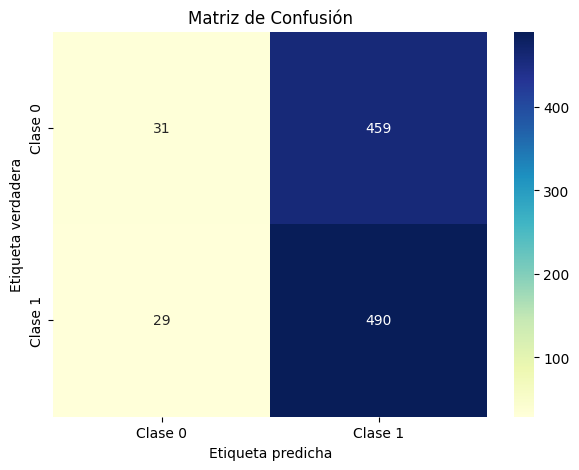

In [64]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_svm_sigmoid)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

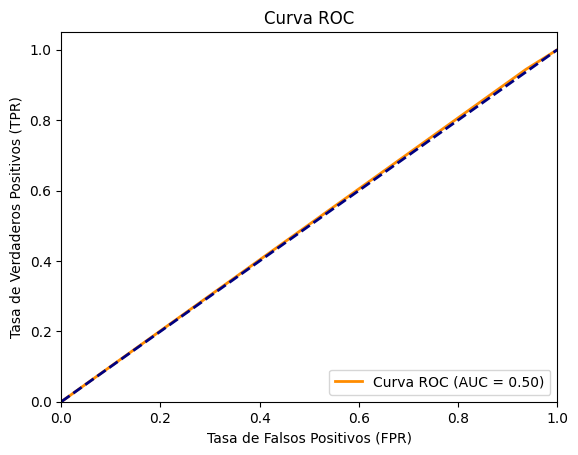

Área bajo la curva ROC (AUC-ROC): 0.50


In [65]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_sigmoid)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_svm_sigmoid)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [66]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_svm_sigmoid)

# Calcular la precisión
precision = precision_score(y_test, y_pred_svm_sigmoid)

# Calcular el recall
recall = recall_score(y_test, y_pred_svm_sigmoid)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_svm_sigmoid)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.5163528245787908
Precisión (Precision): 0.5163329820864068
Recall: 0.9441233140655106
F1-score: 0.6675749318801091


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [67]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(svm_sigmoid_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Scores de validación cruzada: [0.44554455 0.40346535 0.47146402 0.47146402 0.51861042]
Media de los scores: 0.46210967250571217
Desviación estándar de los scores: 0.03763217349036812
Exactitud promedio: 0.46210967250571217


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# **3. ÁRBOL DE DECISIÓN**

**GRID SEARCH**

In [68]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características a considerar en cada división
}

# Crea el objeto GridSearchCV con DecisionTreeClassifier como estimador
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo y los mejores hiperparámetros
dt_best_model = grid_search.best_estimator_
dt_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
dt_accuracy = dt_best_model.score(X_test, y_test)

# Imprime los resultados
print(f"Mejor modelo: {dt_best_model}")
print(f"Mejores hiperparámetros: {dt_best_params}")
print(f"Exactitud en el conjunto de prueba: {dt_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Mejor modelo: DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=42)
Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud en el conjunto de prueba: 0.6788899900891973


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [69]:
# Crear una instancia del modelo de árbol de decisión

dt_model = dt_best_model

# Ajustar el modelo a tus datos de entrenamiento
dt_model.fit(X_train, y_train)

# Las predicciones se almacenan en la variable y_pred.
y_pred_dt = dt_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


**MATRIZ DE CONFUSIÓN**

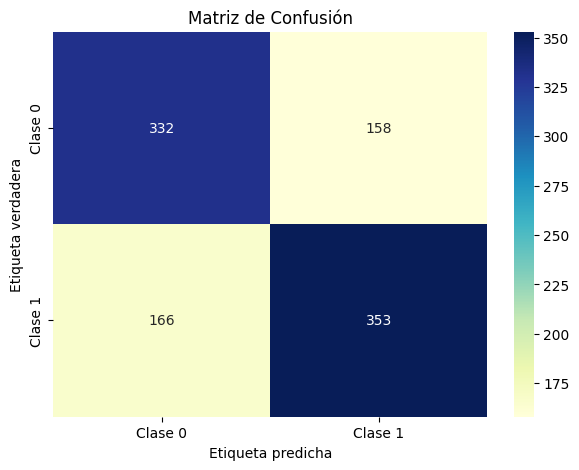

In [70]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_dt)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

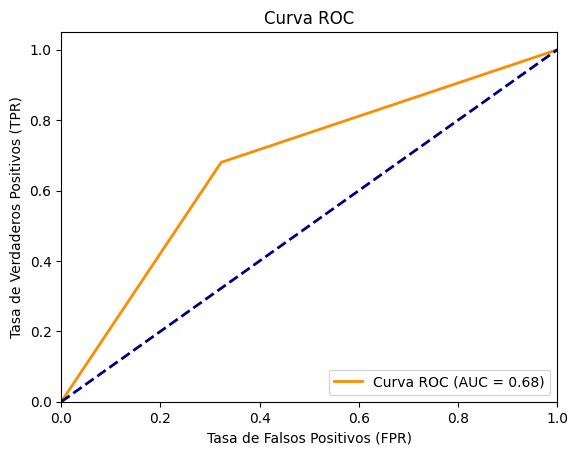

Área bajo la curva ROC (AUC-ROC): 0.68


In [71]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_dt)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [72]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_dt)

# Calcular la precisión
precision = precision_score(y_test, y_pred_dt)

# Calcular el recall
recall = recall_score(y_test, y_pred_dt)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_dt)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.6788899900891973
Precisión (Precision): 0.6908023483365949
Recall: 0.6801541425818882
F1-score: 0.6854368932038835


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [73]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(dt_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

Scores de validación cruzada: [0.6460396  0.66831683 0.67245658 0.71215881 0.67493797]
Media de los scores: 0.674781957103899
Desviación estándar de los scores: 0.02130906614981914
Exactitud promedio: 0.674781957103899


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

#**3. NAIVE BAYES GaussianNB**

**GRID SEARCH**

el clasificador GaussianNB en scikit-learn está diseñado para ser fácil de usar y no requiere una configuración extensa de hiperparámetros, ya que se encarga de estimar los parámetros automáticamente a partir de tus datos de entrenamiento.

In [74]:
# Crear una instancia del clasificador Naive Bayes Gaussiano
gnb_model = GaussianNB()

# Ajustar el modelo a los datos de entrenamiento
gnb_model.fit(X_train, y_train.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred_gnb = gnb_model.predict(X_test)

**MATRIZ DE CONFUSIÓN**

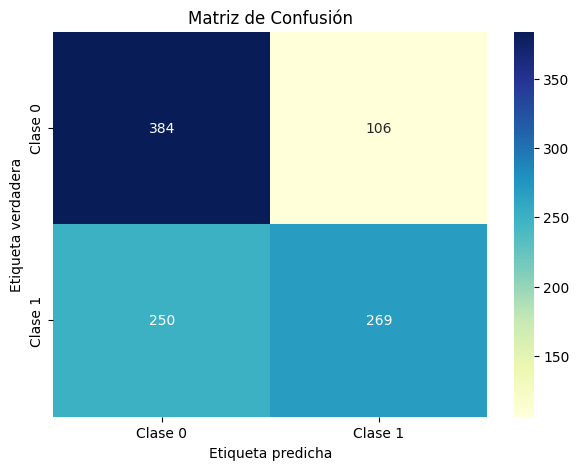

In [75]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_gnb)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

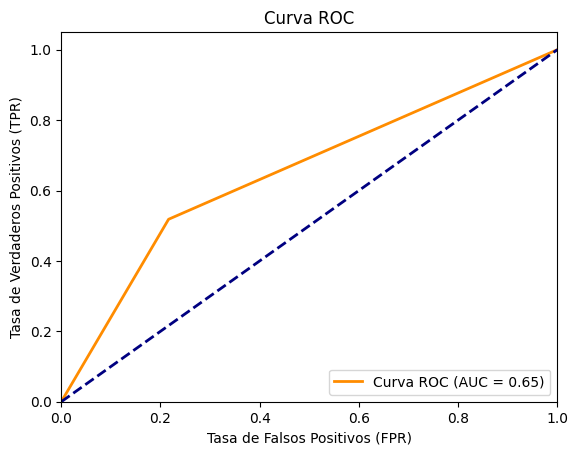

Área bajo la curva ROC (AUC-ROC): 0.65


In [76]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_gnb)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [77]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_gnb)

# Calcular la precisión
precision = precision_score(y_test, y_pred_gnb)

# Calcular el recall
recall = recall_score(y_test, y_pred_gnb)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_gnb)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.647175421209118
Precisión (Precision): 0.7173333333333334
Recall: 0.5183044315992292
F1-score: 0.6017897091722595


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [78]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(gnb_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

Scores de validación cruzada: [0.66089109 0.60891089 0.6426799  0.62779156 0.63523573]
Media de los scores: 0.6351018352455593
Desviación estándar de los scores: 0.017099334793847266
Exactitud promedio: 0.6351018352455593


#**3. NAIVE BAYES MultinomialNB**

**GRID SEARCH**

 En el clasificador MultinomialNB no es valido utilizar datos que contienen valores negativos

In [79]:
# Crear una instancia de MultinomialNB con suavizado Laplace
mnb_model = MultinomialNB()
# Ajustar el modelo a los datos de entrenamiento
mnb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_mnb = mnb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**MATRIZ DE CONFUSIÓN**

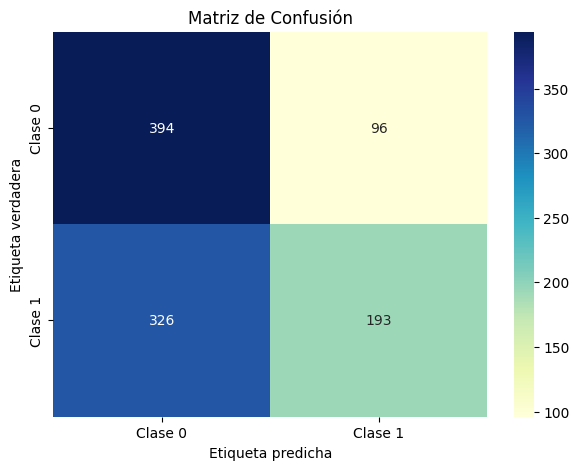

In [80]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_mnb)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

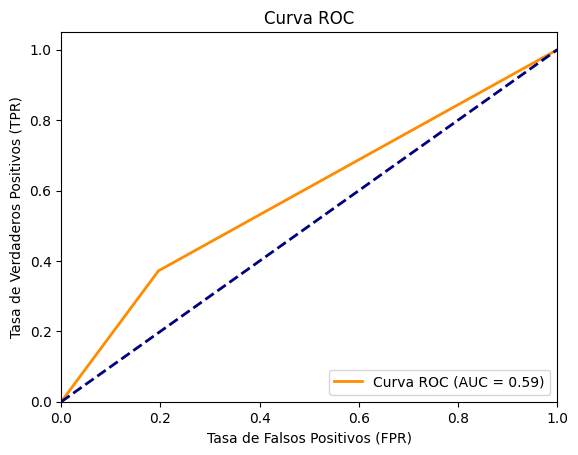

Área bajo la curva ROC (AUC-ROC): 0.59


In [81]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mnb)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_mnb)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [82]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_mnb)

# Calcular la precisión
precision = precision_score(y_test, y_pred_mnb)

# Calcular el recall
recall = recall_score(y_test, y_pred_mnb)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_mnb)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.5817641228939544
Precisión (Precision): 0.6678200692041523
Recall: 0.371868978805395
F1-score: 0.4777227722772277


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [83]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(gnb_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

Scores de validación cruzada: [0.66089109 0.60891089 0.6426799  0.62779156 0.63523573]
Media de los scores: 0.6351018352455593
Desviación estándar de los scores: 0.017099334793847266
Exactitud promedio: 0.6351018352455593


# **3. REGRESION LOGISTICA**

**GRID SEARCH**

In [84]:
# Asegúrate de que tus etiquetas sean arreglos unidimensionales
y_train = y_train.ravel()
y_test = y_test.ravel()

# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de C
}

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

print("Iniciando búsqueda en cuadrícula...")

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

print("Búsqueda en cuadrícula completada.")

# Obtiene el mejor modelo y los mejores hiperparámetros
lr_best_model = grid_search.best_estimator_
lr_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
lr_accuracy = lr_best_model.score(X_test, y_test)

# Imprime los resultados
print(f"Mejor modelo: {lr_best_model}")
print(f"Mejores hiperparámetros: {lr_best_params}")
print(f"Exactitud en el conjunto de prueba: {lr_accuracy}")

Iniciando búsqueda en cuadrícula...
Búsqueda en cuadrícula completada.
Mejor modelo: LogisticRegression(C=100)
Mejores hiperparámetros: {'C': 100}
Exactitud en el conjunto de prueba: 0.6442021803766105


In [85]:
# Creando un modelo de regresión logística (lr) con los siguientes hiperparámetros:
# C: Controla la inversa de la fuerza de regularización. Valores más pequeños de C aumentan la regularización, lo que puede ayudar a prevenir el sobreajuste.
# max_iter: El número máximo de iteraciones para la convergencia del modelo.
# penalty: El tipo de penalización a aplicar L1 (Lasso), que puede llevar a la selección de características.
# solver: El solucionador de optimización a utilizar. 'saga' es adecuado para la penalización L1.
lr_model = lr_best_model

# Entrenar un modelo de regresión logística
lr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)

**MATRIZ DE CONFUSIÓN**

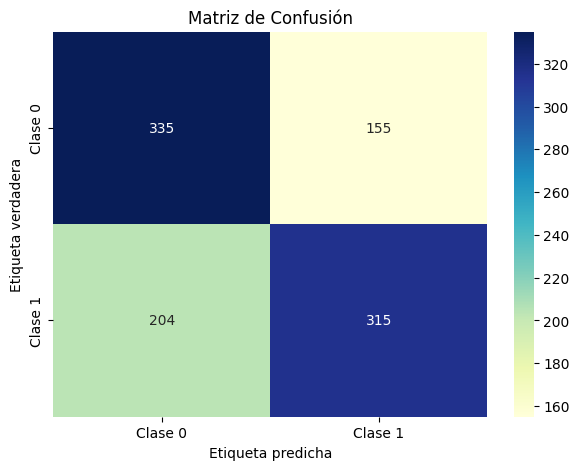

In [86]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_lr)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

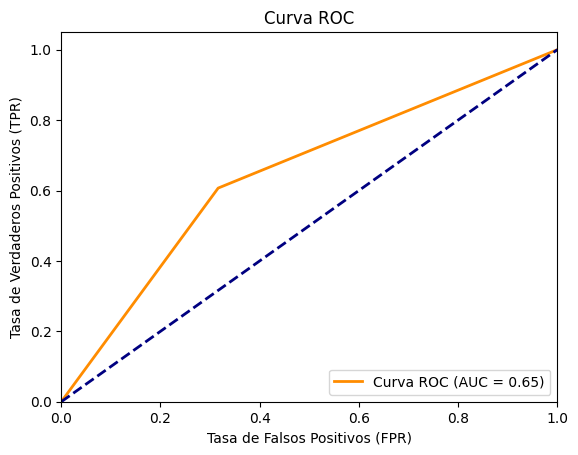

Área bajo la curva ROC (AUC-ROC): 0.65


In [87]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_lr)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [88]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_lr)

# Calcular la precisión
precision = precision_score(y_test, y_pred_lr)

# Calcular el recall
recall = recall_score(y_test, y_pred_lr)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_lr)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.6442021803766105
Precisión (Precision): 0.6702127659574468
Recall: 0.6069364161849711
F1-score: 0.6370070778564206


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [89]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(lr_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

Scores de validación cruzada: [0.65841584 0.59405941 0.6674938  0.64764268 0.63275434]
Media de los scores: 0.6400732132766627
Desviación estándar de los scores: 0.025754508575944714
Exactitud promedio: 0.6400732132766627


# **3. XGBOOST**

**GRID SEARCH**

In [90]:
# Define la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 2, 3]
}

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

print("Iniciando búsqueda en cuadrícula...")

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

print("Búsqueda en cuadrícula completada.")

# Obtiene el mejor modelo y los mejores hiperparámetros
xgb_best_model = grid_search.best_estimator_
xgb_best_params = grid_search.best_params_

# Evalúa el mejor modelo en el conjunto de prueba
xgb_accuracy = xgb_best_model.score(X_test, y_test)

# Imprime los resultados
print(f"Mejor modelo: {xgb_best_model}")
print(f"Mejores hiperparámetros: {xgb_best_params}")
print(f"Exactitud en el conjunto de prueba: {xgb_accuracy}")

Iniciando búsqueda en cuadrícula...
Búsqueda en cuadrícula completada.
Mejor modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mejores hiperparámetros: {'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 300}
Exactitud en el conjunto de prueba: 0.7185332011892963


**XGBOOST CON HIPERPARAMETROS AJUSTADOS POR GRID SEARCH**

In [91]:
# Crear una instancia del modelo XGBoost
xgb_model = xgb_best_model

# Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

**MATRIZ DE CONFUSIÓN**

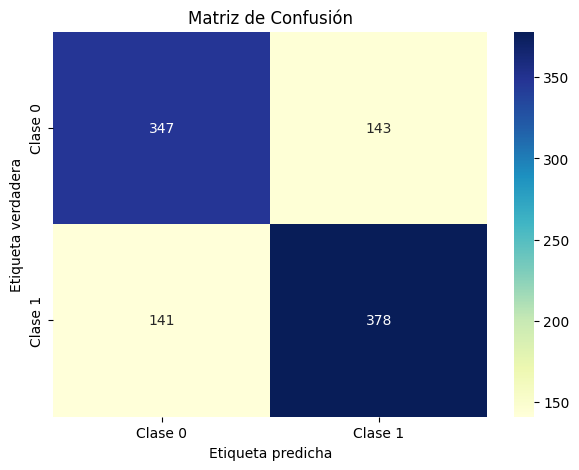

In [92]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_xgb)
# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

**CURVA ROC**

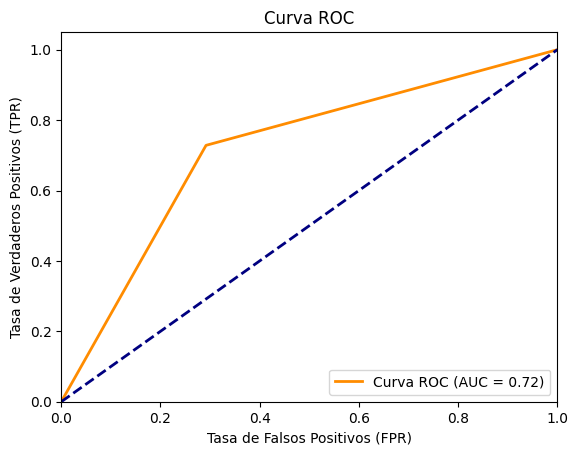

Área bajo la curva ROC (AUC-ROC): 0.72


In [93]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_xgb)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [94]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_xgb)

# Calcular la precisión
precision = precision_score(y_test, y_pred_xgb)

# Calcular el recall
recall = recall_score(y_test, y_pred_xgb)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_xgb)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.7185332011892963
Precisión (Precision): 0.72552783109405
Recall: 0.7283236994219653
F1-score: 0.7269230769230769


**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [95]:
# Crea un objeto cv de tipo KFold con los siguientes parámetros:
# n_splits=5: Esto significa que se realizará la validación cruzada en 5 pliegues (folds).
# shuffle=True: Los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=48: Establece una semilla aleatoria para garantizar reproducibilidad.
cv = KFold(n_splits=5, shuffle=True, random_state=48)

# Devuelve una matriz de puntuaciones de validación cruzada para cada pliegue.
scores = cross_val_score(xgb_model, X, y.ravel(), cv=cv)

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")

Scores de validación cruzada: [0.7029703  0.68069307 0.69727047 0.71960298 0.72208437]
Media de los scores: 0.704524236542761
Desviación estándar de los scores: 0.015222897174056177
Exactitud promedio: 0.704524236542761



#**4. REALIZAR UN ENSAMBLE DE LOS MODELOS**  

## Ensamble por Votación de la mayoría

Se realiza un ensamble simple conocido como "Votación de la mayoría". En este caso, se están combinando las predicciones de tres modelos base: SVMKermelRBF, DecisionTreeClassifier, y XGBClassifier (XGBoost), y se utiliza un enfoque de votación para determinar la predicción final.

El ensamble de votación de la mayoría funciona tomando las predicciones de cada modelo base y asignando un voto a la clase predicha por cada modelo. Luego, la clase que recibe la mayoría de votos se considera la predicción final del ensamble. Este enfoque es eficaz cuando los modelos base son diversificados y tienden a cometer errores diferentes en distintas instancias.

In [96]:
# ENSAMBLE
y_pred_ensamble = []

for rbf, dt, xgb in zip(y_pred_svm_rbf, y_pred_dt,y_pred_xgb):
  votes = {0: 0, 1: 0, 2: 0}

  votes[rbf] += 1
  votes[dt] += 1
  votes[xgb] += 1

  majority_vote = max(votes, key=votes.get)
  y_pred_ensamble.append(majority_vote)


**MATRIZ DE CONFUSIÓN**

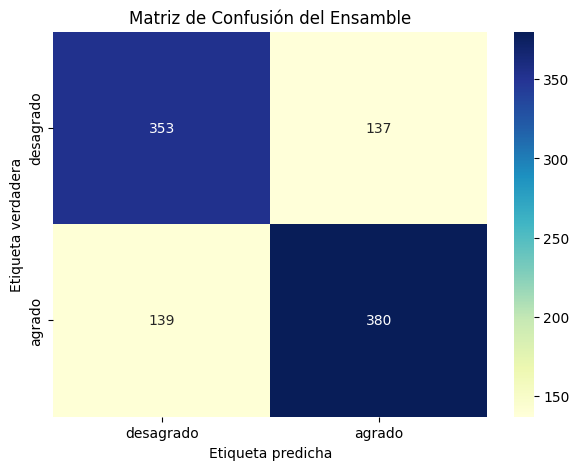

In [97]:
# Matriz de confusión
c = confusion_matrix(y_test, y_pred_ensamble)

# Crear una figura de Matplotlib con un tamaño de 7x5 pulgadas
plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['desagrado', 'agrado'], yticklabels=['desagrado', 'agrado'], cmap='YlGnBu')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()

**CURVA ROC**

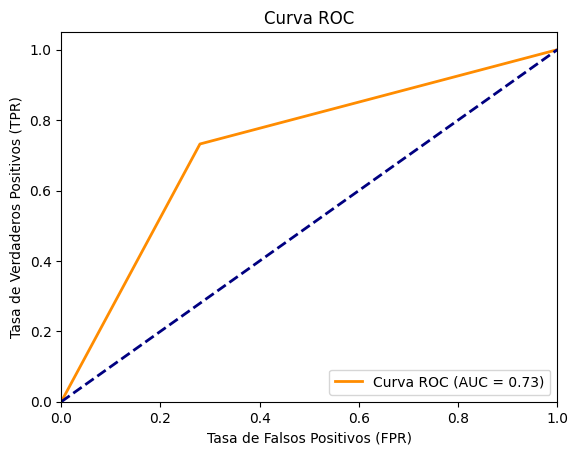

Área bajo la curva ROC (AUC-ROC): 0.73


In [98]:
# Calcula la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ensamble)

# Calcula el área bajo la Curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_ensamble)

# Dibuja la Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**

In [99]:
# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (final_prediction) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_ensamble)

# Calcular la precisión
precision = precision_score(y_test, y_pred_ensamble)

# Calcular el recall
recall = recall_score(y_test, y_pred_ensamble)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_ensamble)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Exactitud (Accuracy): 0.7264618434093162
Precisión (Precision): 0.7350096711798839
Recall: 0.7321772639691715
F1-score: 0.7335907335907336


Se optó por utilizar un ensamble de tres modelos base: SVMKermelRBF, DecisionTreeClassifier, y XGBClassifier (XGBoost), ya que este enfoque proporcionó valores equilibrados en las métricas de evaluación. Con una exactitud del 72.64%, una precisión del 73.50%, un recall del 73.21%, y un F1-score del 73.35%, el ensamble demostró un rendimiento sólido al lograr un equilibrio entre la capacidad de clasificar correctamente las muestras positivas y negativas.

Exactitud (Accuracy): La exactitud mide la proporción de predicciones correctas en el total de predicciones. Es una métrica común para evaluar el rendimiento global del modelo. En este caso, el modelo logra una exactitud del 72.64%, lo que significa que el 72.64% de las predicciones son correctas.

Precisión (Precision): La precisión mide la proporción de verdaderos positivos (predicciones correctas) entre todas las predicciones positivas. En otras palabras, es la capacidad del modelo para predecir correctamente los positivos. En este caso, el modelo tiene una precisión del 73.50%, lo que indica que el 73.50% de las predicciones positivas son correctas.

Recall (Recuperación o Sensibilidad): El recall mide la proporción de verdaderos positivos entre todas las instancias reales de una clase. Es importante cuando el coste de los falsos negativos es alto, ya que se centra en la capacidad del modelo para encontrar y capturar los positivos. El recall es del 73.21%, lo que significa que el modelo captura el 73.21% de las instancias positivas.

F1-score: El F1-score es la media armónica de precisión y recall. Combina la capacidad del modelo para predecir correctamente los positivos y para capturar los positivos en un solo valor. En este caso, el F1-score es del 73.35%, lo que indica un equilibrio entre precisión y recall.

Nota: Valores obtenidos en una de las mejores pruebas.







**VALIDACIÓN CRUZADA (CROSS-VALIDATION) CON LA TÉCNICA K-FOLD**

In [100]:
# Crear el ensamble por votación
voting_model = VotingClassifier(
    estimators=[('rbf', svm_rbf_model), ('dt', dt_model), ('xgb', xgb_model)],
    voting='hard'  # 'hard' para votación por mayoría, 'soft' para votación ponderada por probabilidades
)

# Realizar la validación cruzada
scores = cross_val_score(voting_model, X, y, cv=5, scoring='accuracy')  # Dividir en 5 pliegues

# Imprimir los resultados de la validación cruzada
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviación estándar de los scores: {scores.std()}")
print(f"Exactitud promedio: {np.mean(scores)}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

Scores de validación cruzada: [0.66089109 0.64851485 0.57320099 0.67741935 0.68238213]
Media de los scores: 0.6484816843967275
Desviación estándar de los scores: 0.0395165945976796
Exactitud promedio: 0.6484816843967275


## Ensamble apilado

En este código, hemos definido tres modelos base (SVM con kernel RBF, Árbol de Decisión y XGBoost) y un modelo meta (Regresión Logística) que se utiliza para combinar las predicciones de los modelos base.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Definir los modelos base
base_models = [
    ('svm_rbf', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)),
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('xgboost', xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, min_child_weight=1))
]

# Definir el modelo meta
meta_model = LogisticRegression()

# Crear el ensamble apilado
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Entrenar el ensamble apilado en los datos de entrenamiento
stacking_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_stacking = stacking_model.predict(X_test)

# Calcular la exactitud del ensamble apilado
accuracy = accuracy_score(y_test, y_pred_stacking)
print(f'Exactitud del ensamble apilado: {accuracy}')


Exactitud del ensamble apilado: 0.7274529236868187


**CURVA ROC**

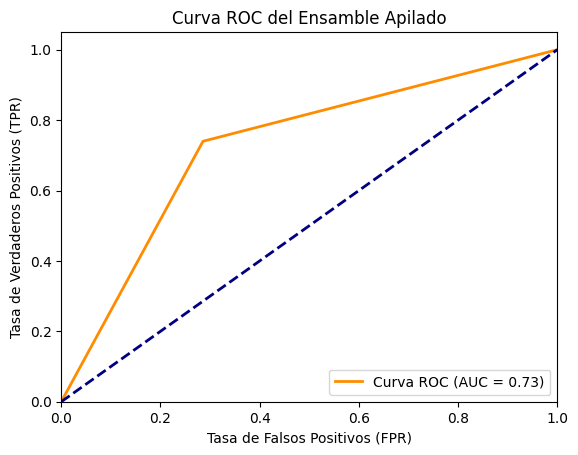

Área bajo la curva ROC (AUC-ROC): 0.73


In [102]:
# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_stacking)

# Calcular el área bajo la curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_stacking)

# Dibujar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Ensamble Apilado')
plt.legend(loc="lower right")
plt.show()

print(f'Área bajo la curva ROC (AUC-ROC): {auc:.2f}')

**PRECISIÓN, RECALL Y F1-SCORE**




In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculo de metricas a partir de las etiquetas reales (y_test) y las predicciones del modelo (y_pred) en el conjunto de prueba.

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_stacking)

# Calcular la precisión
precision = precision_score(y_test, y_pred_stacking)

# Calcular el recall
recall = recall_score(y_test, y_pred_stacking)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_stacking)

# Imprimir los resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Exactitud (Accuracy): 0.7274529236868187
Precisión (Precision): 0.732824427480916
Recall: 0.7398843930635838
F1-score: 0.7363374880153404


**MATRIZ DE CONFUSION**

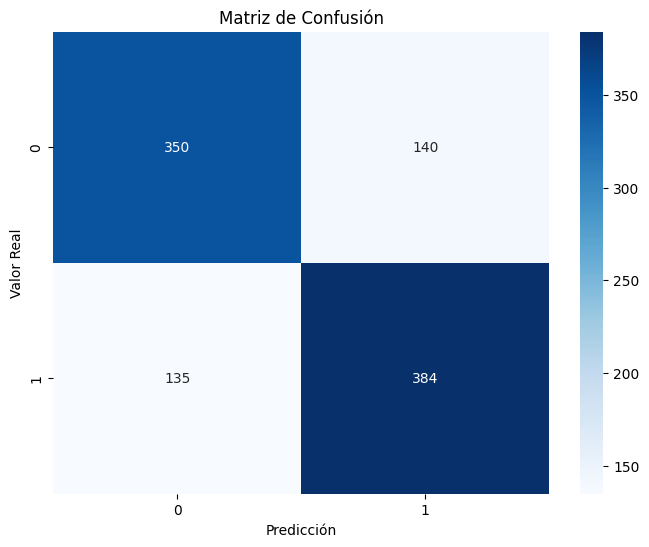

Matriz de Confusión:
[[350 140]
 [135 384]]


In [104]:
# Crear un mapa de calor (heatmap) de la matriz de confusión 'c' utilizando Seaborn
# - 'annot=True': Muestra los valores reales en las celdas del mapa de calor
# - 'fmt='g'': Formato para mostrar los valores (en formato general)
# - 'xticklabels' y 'yticklabels': Etiquetas para el eje x (etiqueta predicha) y el eje y (etiqueta verdadera)
# - 'cmap='YlGnBu'': Paleta de colores utilizada para representar los valores en el mapa de calor
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_stacking)

# Muestra la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Imprime la matriz de confusión en texto
print("Matriz de Confusión:")
print(confusion)


**VALICACION CRUZADA**

In [105]:
# Definir los modelos base
base_models = [
    ('svm_rbf', svm_rbf_model),
    ('decision_tree', dt_model),
    ('xgboost', xgb_model)
]

# Definir el modelo meta
meta_model = LogisticRegression()

# Crear el ensamble apilado
#stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Realizar la validación cruzada
cv_scores = cross_val_score(stacking_model, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(cv_scores)
print(f"Exactitud promedio: {cv_scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Resultados de la validación cruzada:
[0.7029703  0.64851485 0.54342432 0.68734491 0.71712159]
Exactitud promedio: 0.6598751934746824
